In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_excel("datos_base.xlsx")

In [3]:
df

,Nombre Semana,Año,Semestre,Trimestre,Mes,Dia del Mes,Marca,Segmento,Mercado,Cantidad,Facturación,Precio,Sub Marca
0,Semana 1,2020,S1-20,T1-20,Enero 2020,"Jueves, 2 de Enero de 2020",Nike,Futbol,Mercado 1,691,6093252.0,8818.020260,Nike
1,Semana 1,2020,S1-20,T1-20,Enero 2020,"Jueves, 2 de Enero de 2020",Nike,Futbol,Mercado 2,683,6022704.0,8818.014641,Nike
2,Semana 1,2020,S1-20,T1-20,Enero 2020,"Jueves, 2 de Enero de 2020",Nike,Running,Mercado 1,661,5348147.0,8090.993949,Nike
3,Semana 1,2020,S1-20,T1-20,Enero 2020,"Jueves, 2 de Enero de 2020",Nike,Running,Mercado 2,520,4207317.0,8090.994231,Nike
4,Semana 1,2020,S1-20,T1-20,Enero 2020,"Jueves, 2 de Enero de 2020",Nike,Social,Mercado 1,993,12547566.0,12636.018127,Nike
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25165,Semana 9,2022,S1-22,T1-22,Febrero 2022,"Sabado, 26 de Febrero de 2022",Asics,Running,Mercado 2,526,5477198.0,10412.923954,Asics
25166,Semana 9,2022,S1-22,T1-22,Febrero 2022,"Sabado, 26 de Febrero de 2022",Asics,Social,Mercado 1,279,3424165.0,12272.992832,Onitsuka Tiger
25167,Semana 9,2022,S1-22,T1-22,Febrero 2022,"Sabado, 26 de Febrero de 2022",Asics,Social,Mercado 2,242,2970059.0,12272.971074,Onitsuka Tiger
25168,Semana 9,2022,S1-22,T1-22,Febrero 2022,"Sabado, 26 de Febrero de 2022",Asics,Social,Mercado 1,128,1163648.0,9091.000000,Asics Tiger


# Limpieza

In [4]:
print(df.isnull().sum())
print(f'\nDuplicados:{df.duplicated().sum()}')

Nombre Semana    0
Año              0
Semestre         0
Trimestre        0
Mes              0
Dia del Mes      0
Marca            0
Segmento         0
Mercado          0
Cantidad         0
Facturación      0
Precio           0
Sub Marca        0
dtype: int64

Duplicados:0


In [5]:
df.dtypes

Nombre Semana     object
Año                int64
Semestre          object
Trimestre         object
Mes               object
Dia del Mes       object
Marca             object
Segmento          object
Mercado           object
Cantidad           int64
Facturación      float64
Precio           float64
Sub Marca         object
dtype: object

### Conversion de columna a fecha

In [6]:
df['nombre_del_dia'] = df['Dia del Mes'].str.split(', ').str[0]
df['Dia del Mes'] = df['Dia del Mes'].str.split(', ').str[1]

In [7]:
# Cambio de columna 'Dia del mes' a formato fecha
month_mapping = {'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6, 'Julio': 7,
                     'Agosto': 8, 'Setiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12}

df[['dia','mes','año']] =df['Dia del Mes'].str.split(' de ', expand = True)
df['mes'] = df['mes'].replace(month_mapping)
df['fecha'] = df['dia'].astype(str) + "/" + df['mes'].astype(str) + "/" + df['año'].astype(str)
df['fecha'] = pd.to_datetime(df['fecha'], format = '%d/%m/%Y')

### Distribuciones y outliers

In [8]:
def distr_values(variable, dataframe, titulo = ""):
    fig, ax = plt.subplots(1,2, figsize=(7,3))

    fig.suptitle(titulo, y = 1.05)

    ax[0].set_title(f"Distribucion de {variable}")
    sns.histplot(data = dataframe, x = f"{variable}", kde = True, ax = ax[0])

    ax[1].set_title(f"Boxplot de {variable}")
    sns.boxplot(data=dataframe, x = f"{variable}", ax = ax[1])

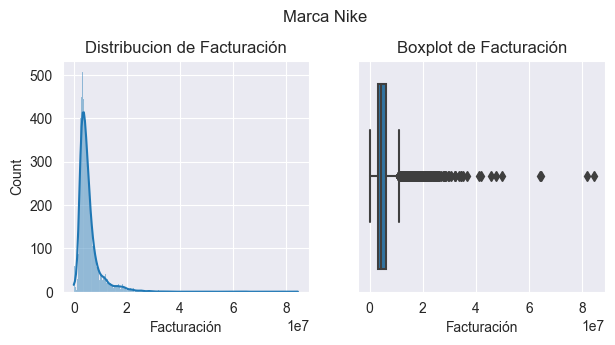

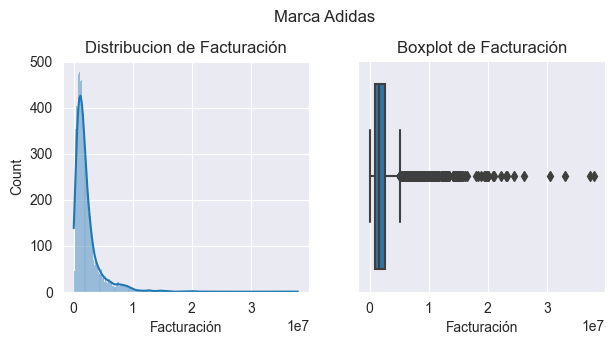

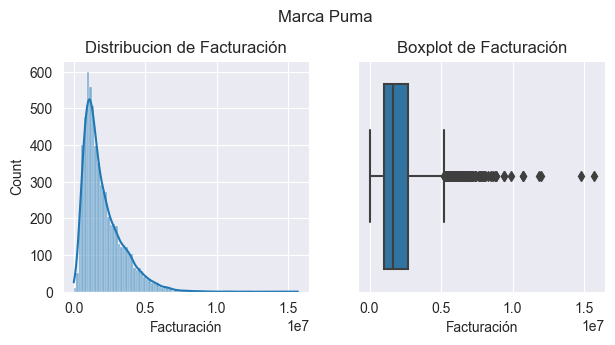

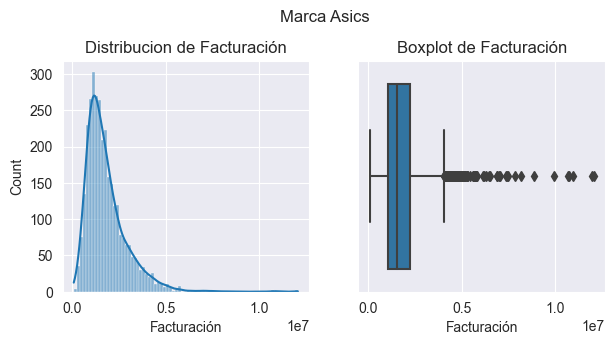

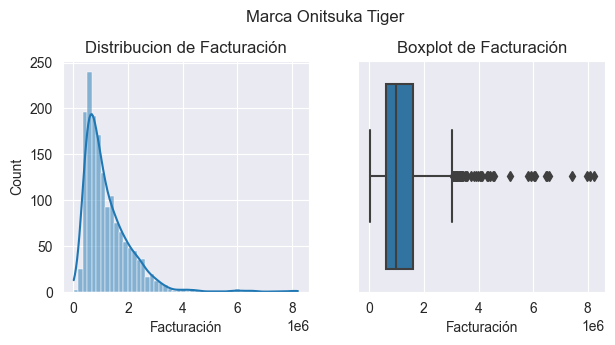

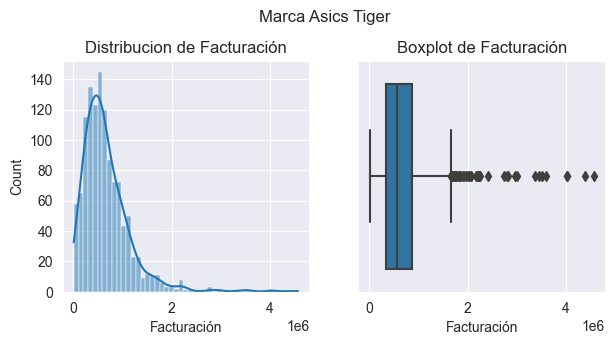

In [9]:
for marca in df['Sub Marca'].unique():
    sub_df = df[df['Sub Marca'] == marca]
    distr_values('Facturación',sub_df, titulo = f'Marca {marca}')

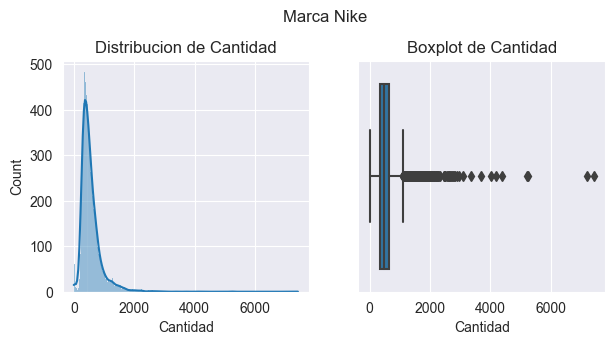

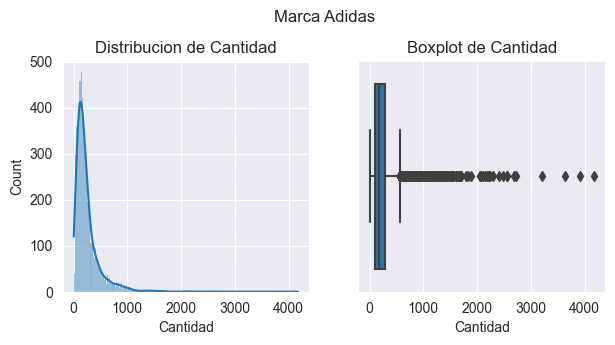

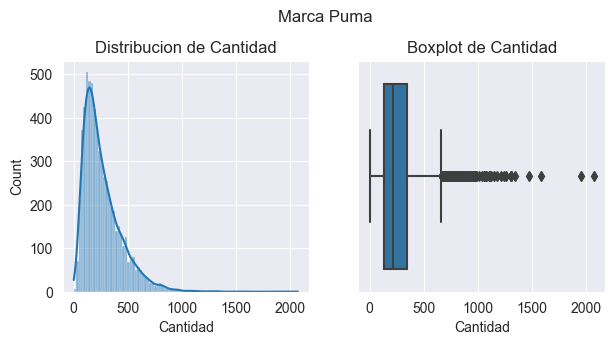

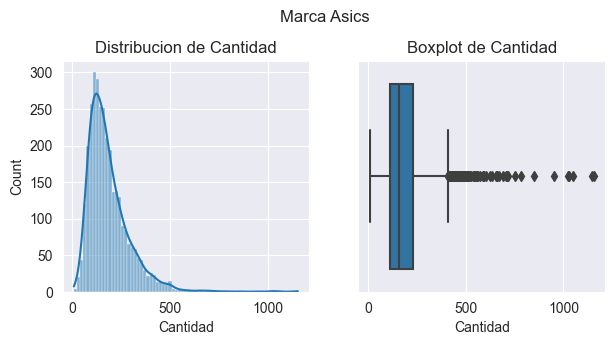

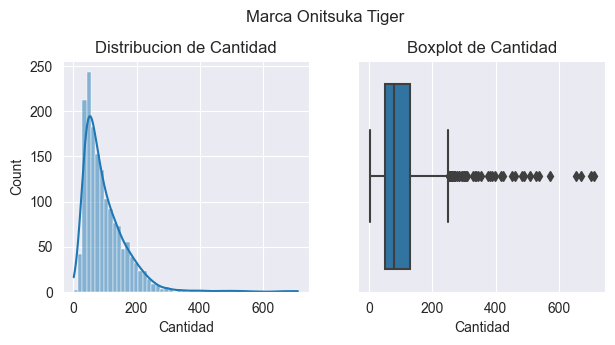

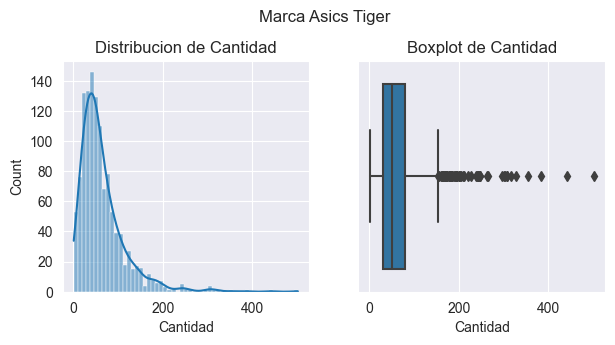

In [10]:
#Distribuciones de Cantidad
for marca in df['Sub Marca'].unique():
    sub_df = df[df['Sub Marca'] == marca]
    distr_values('Cantidad',sub_df, titulo = f'Marca {marca}')

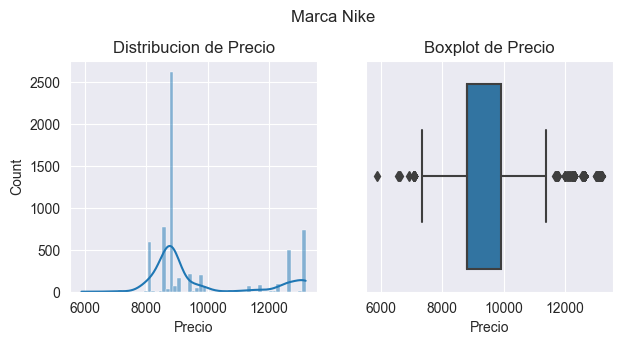

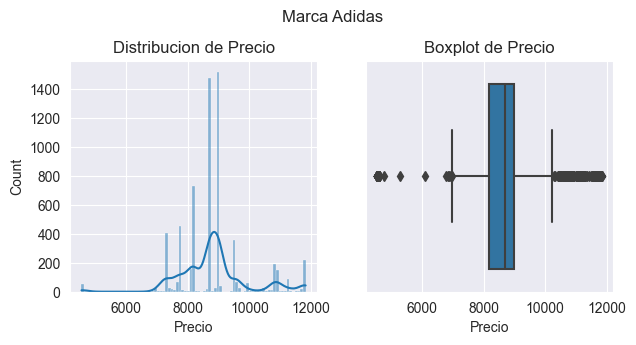

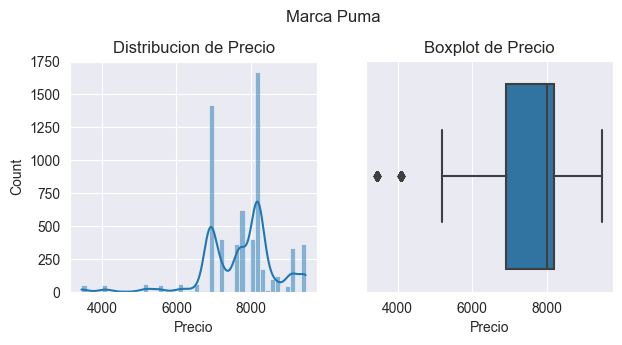

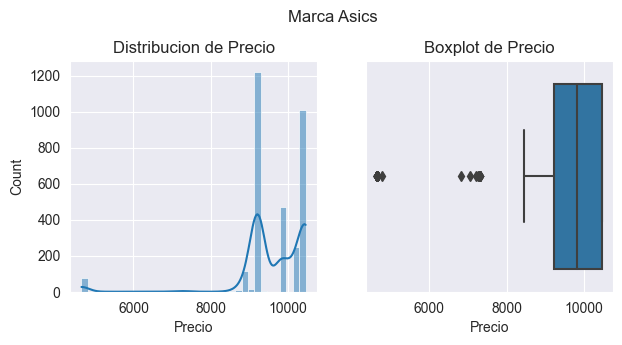

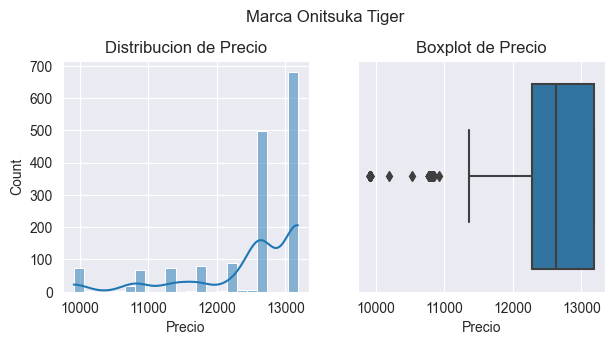

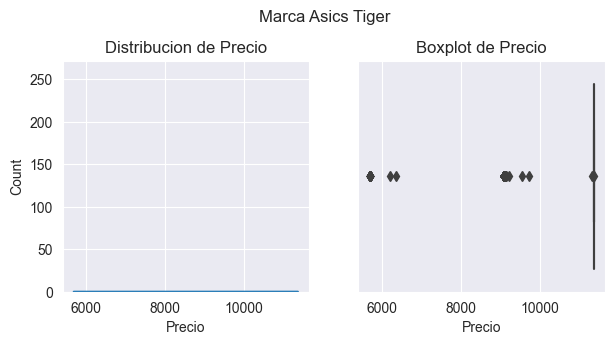

In [11]:
#Distribuciones de Precio
for marca in df['Sub Marca'].unique():
    sub_df = df[df['Sub Marca'] == marca]
    distr_values('Precio',sub_df, titulo = f'Marca {marca}')

# Analisis

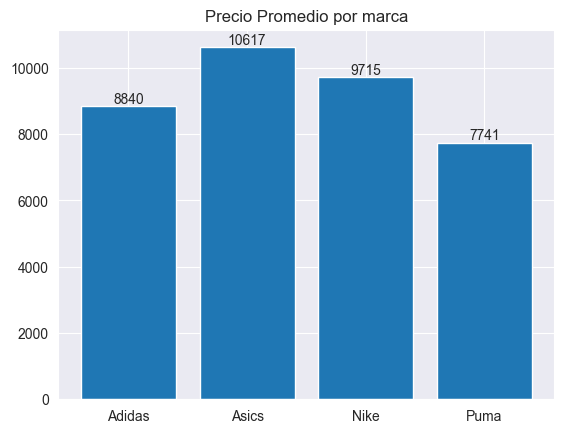

In [12]:
marca_precio_promedio = df.groupby(by = ['Marca']).agg({"Precio": "mean"})

plt.bar(marca_precio_promedio.index, marca_precio_promedio['Precio'])

for i, value in enumerate(marca_precio_promedio['Precio']):
    plt.text(i, value + 1, str(int(value)), ha='center', va='bottom')

plt.title('Precio Promedio por marca')
plt.show()

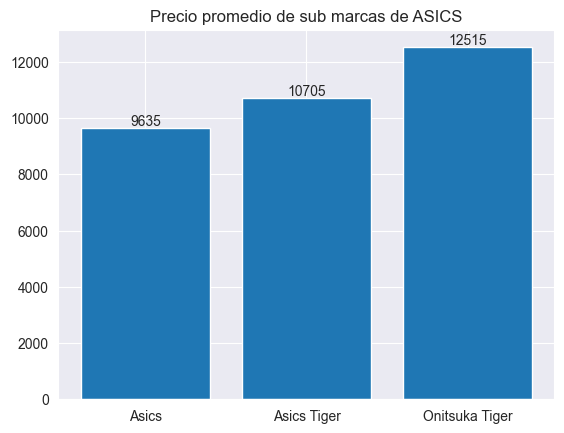

In [13]:
df_asics = df[df['Marca'] == 'Asics']
submarcas_precio_promedio = df_asics.groupby(by = 'Sub Marca').agg({'Precio':'mean'})

df_sub_asics = df[df['Sub Marca'] == 'Asics']
df_sub_asics.groupby(by = "Segmento").agg({'Precio':'mean'})

plt.bar(submarcas_precio_promedio.index, submarcas_precio_promedio['Precio'])

for i, value in enumerate(submarcas_precio_promedio['Precio']):
    plt.text(i, value + 1, str(int(value)), ha='center', va='bottom')

plt.title('Precio promedio de sub marcas de ASICS')
plt.show()

In [14]:
df['semana_año'] = +df['Año'].astype(str) + "_"  +df['Nombre Semana'].str.split(" ").str[1]
df['semana_año'] = pd.to_datetime(df['semana_año'] + '_1', format='%Y_%W_%w').dt.strftime('%Y_%W')

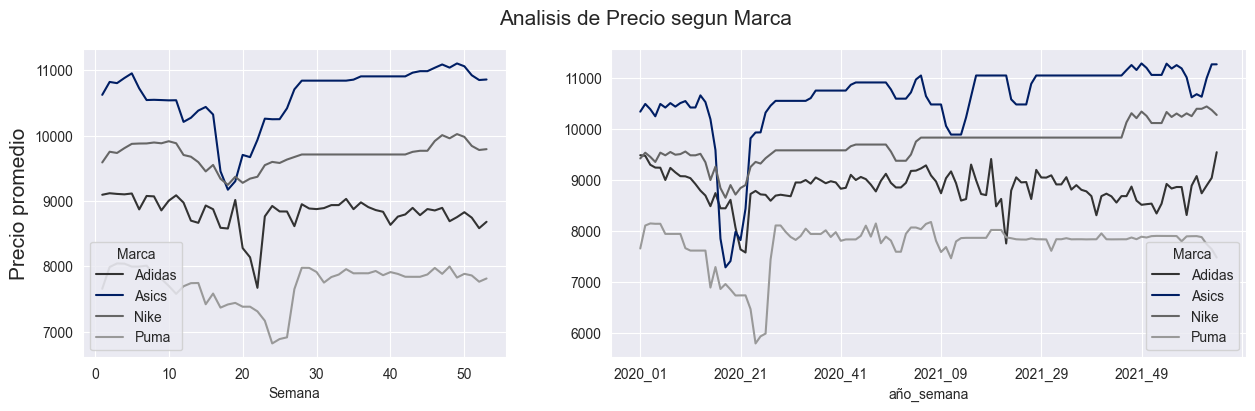

In [15]:
colors = ['#333333','#001e64', '#666666', '#999999']

analisis = 'Marca'
valores = 'Precio'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), gridspec_kw={'width_ratios': [1, 1.5]})

#Plot Semanas acumuladas
pivot_precio = df.pivot_table(index = 'Nombre Semana', columns = analisis, values = valores, aggfunc='mean').reset_index()
pivot_precio["Nombre Semana"] = pivot_precio["Nombre Semana"].str.split(" ").str[1].astype(int)
pivot_precio = pivot_precio.sort_values(by = "Nombre Semana").set_index('Nombre Semana')
pivot_precio.plot(color = colors,ax=axes[0], xlabel = 'Semana')
axes[0].set_ylabel("Precio promedio", fontsize = 15)

#plot evolucion
pivot_evolucion_precio = df.pivot_table(index = 'semana_año', columns= analisis, values= valores, aggfunc= 'mean')
pivot_evolucion_precio.plot(color = colors, ax = axes[1], xlabel = "año_semana")

#plot show
fig.suptitle(f'Analisis de {valores} segun {analisis}', fontsize = 15)
plt.show()

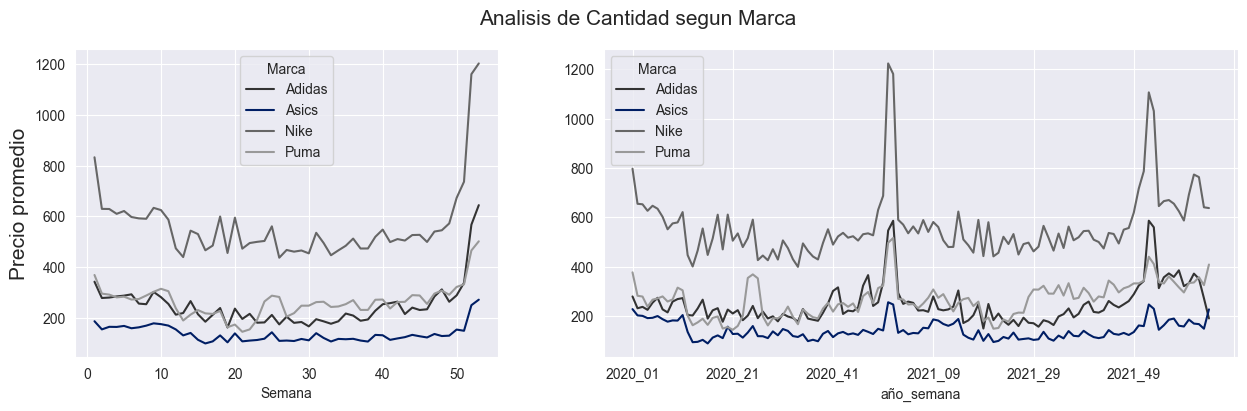

In [16]:
colors = ['#333333','#001e64', '#666666', '#999999']

analisis = 'Marca'
valores = 'Cantidad'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), gridspec_kw={'width_ratios': [1, 1.5]})

#Plot Semanas acumuladas
pivot_precio = df.pivot_table(index = 'Nombre Semana', columns = analisis, values = valores, aggfunc='mean').reset_index()
pivot_precio["Nombre Semana"] = pivot_precio["Nombre Semana"].str.split(" ").str[1].astype(int)
pivot_precio = pivot_precio.sort_values(by = "Nombre Semana").set_index('Nombre Semana')
pivot_precio.plot(color = colors,ax=axes[0], xlabel = 'Semana')
axes[0].set_ylabel("Precio promedio", fontsize = 15)

#plot evolucion
pivot_evolucion_precio = df.pivot_table(index = 'semana_año', columns= analisis, values= valores, aggfunc= 'mean')
pivot_evolucion_precio.plot(color = colors, ax = axes[1], xlabel = "año_semana")

#plot show
fig.suptitle(f'Analisis de {valores} segun {analisis}', fontsize = 15)
plt.show()

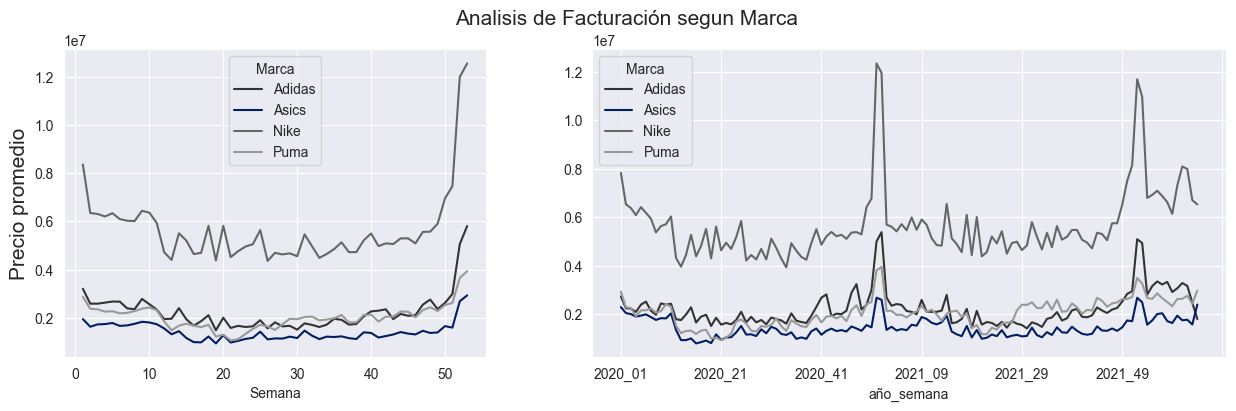

In [17]:
colors = ['#333333','#001e64', '#666666', '#999999']

analisis = 'Marca'
valores = 'Facturación'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), gridspec_kw={'width_ratios': [1, 1.5]})

#Plot Semanas acumuladas
pivot_precio = df.pivot_table(index = 'Nombre Semana', columns = analisis, values = valores, aggfunc='mean').reset_index()
pivot_precio["Nombre Semana"] = pivot_precio["Nombre Semana"].str.split(" ").str[1].astype(int)
pivot_precio = pivot_precio.sort_values(by = "Nombre Semana").set_index('Nombre Semana')
pivot_precio.plot(color = colors,ax=axes[0], xlabel = 'Semana')
axes[0].set_ylabel("Precio promedio", fontsize = 15)

#plot evolucion
pivot_evolucion_precio = df.pivot_table(index = 'semana_año', columns= analisis, values= valores, aggfunc= 'mean')
pivot_evolucion_precio.plot(color = colors, ax = axes[1], xlabel = "año_semana")

#plot show
fig.suptitle(f'Analisis de {valores} segun {analisis}', fontsize = 15)
plt.show()

Exprimentan fuertes subas a fin de año, ASICS deberia hacer algo al respecto, parece ser la que menos crece.

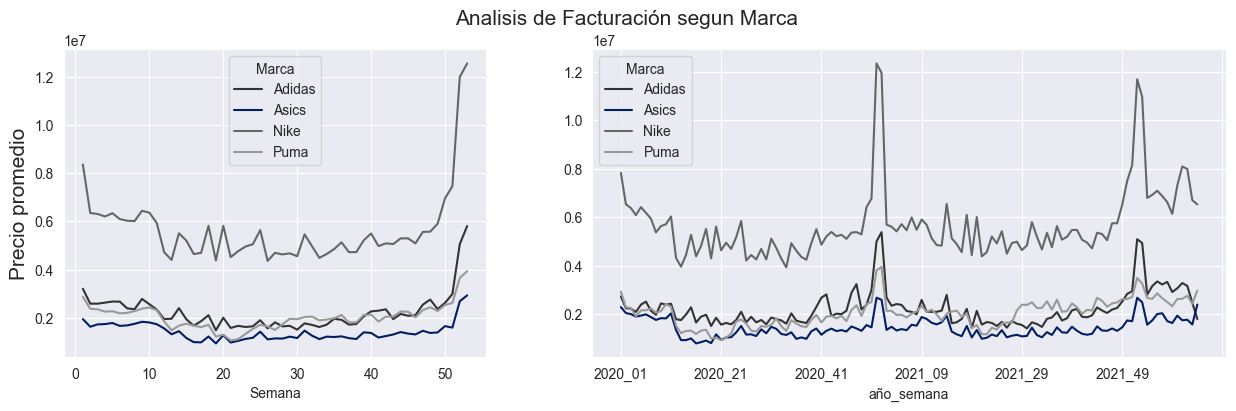

In [18]:
colors = ['#333333', '#001e64', '#666666', '#999999']

analisis = 'Marca'
valores = 'Facturación'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), gridspec_kw={'width_ratios': [1, 1.5]})

#Plot Semanas acumuladas
pivot_precio = df.pivot_table(index='Nombre Semana', columns=analisis, values=valores, aggfunc='mean').reset_index()
pivot_precio["Nombre Semana"] = pivot_precio["Nombre Semana"].str.split(" ").str[1].astype(int)
pivot_precio = pivot_precio.sort_values(by="Nombre Semana").set_index('Nombre Semana')
pivot_precio.plot(color=colors, ax=axes[0], xlabel='Semana')
axes[0].set_ylabel("Precio promedio", fontsize=15)

#plot evolucion
pivot_evolucion_precio = df.pivot_table(index='semana_año', columns=analisis, values=valores, aggfunc='mean')
pivot_evolucion_precio.plot(color=colors, ax=axes[1], xlabel="año_semana")

#plot show
fig.suptitle(f'Analisis de {valores} segun {analisis}', fontsize=15)
plt.show()


In [19]:
def running_o_deportes(row):
    if (row['Segmento'] == 'Running') and (row['Sub Marca'] == 'Asics'):
        return row['Sub Marca'] + '_running'
    elif (row['Segmento'] == 'O. Deportes') and (row['Sub Marca'] == 'Asics'):
        return row['Sub Marca'] + '_deportes'
    else:
        return row['Sub Marca']

df_asics['Sub Marca'] = df_asics.apply(running_o_deportes, axis=1)

C:\Users\agusd\AppData\Local\Temp\ipykernel_13800\3971053450.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asics['Sub Marca'] = df_asics.apply(running_o_deportes, axis=1)


In [20]:
df

,Nombre Semana,Año,Semestre,Trimestre,Mes,Dia del Mes,Marca,Segmento,Mercado,Cantidad,Facturación,Precio,Sub Marca,nombre_del_dia,dia,mes,año,fecha,semana_año
0,Semana 1,2020,S1-20,T1-20,Enero 2020,2 de Enero de 2020,Nike,Futbol,Mercado 1,691,6093252.0,8818.020260,Nike,Jueves,2,1,2020,2020-01-02,2020_01
1,Semana 1,2020,S1-20,T1-20,Enero 2020,2 de Enero de 2020,Nike,Futbol,Mercado 2,683,6022704.0,8818.014641,Nike,Jueves,2,1,2020,2020-01-02,2020_01
2,Semana 1,2020,S1-20,T1-20,Enero 2020,2 de Enero de 2020,Nike,Running,Mercado 1,661,5348147.0,8090.993949,Nike,Jueves,2,1,2020,2020-01-02,2020_01
3,Semana 1,2020,S1-20,T1-20,Enero 2020,2 de Enero de 2020,Nike,Running,Mercado 2,520,4207317.0,8090.994231,Nike,Jueves,2,1,2020,2020-01-02,2020_01
4,Semana 1,2020,S1-20,T1-20,Enero 2020,2 de Enero de 2020,Nike,Social,Mercado 1,993,12547566.0,12636.018127,Nike,Jueves,2,1,2020,2020-01-02,2020_01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25165,Semana 9,2022,S1-22,T1-22,Febrero 2022,26 de Febrero de 2022,Asics,Running,Mercado 2,526,5477198.0,10412.923954,Asics,Sabado,26,2,2022,2022-02-26,2022_09
25166,Semana 9,2022,S1-22,T1-22,Febrero 2022,26 de Febrero de 2022,Asics,Social,Mercado 1,279,3424165.0,12272.992832,Onitsuka Tiger,Sabado,26,2,2022,2022-02-26,2022_09
25167,Semana 9,2022,S1-22,T1-22,Febrero 2022,26 de Febrero de 2022,Asics,Social,Mercado 2,242,2970059.0,12272.971074,Onitsuka Tiger,Sabado,26,2,2022,2022-02-26,2022_09
25168,Semana 9,2022,S1-22,T1-22,Febrero 2022,26 de Febrero de 2022,Asics,Social,Mercado 1,128,1163648.0,9091.000000,Asics Tiger,Sabado,26,2,2022,2022-02-26,2022_09


KeyError: 'semana_año'

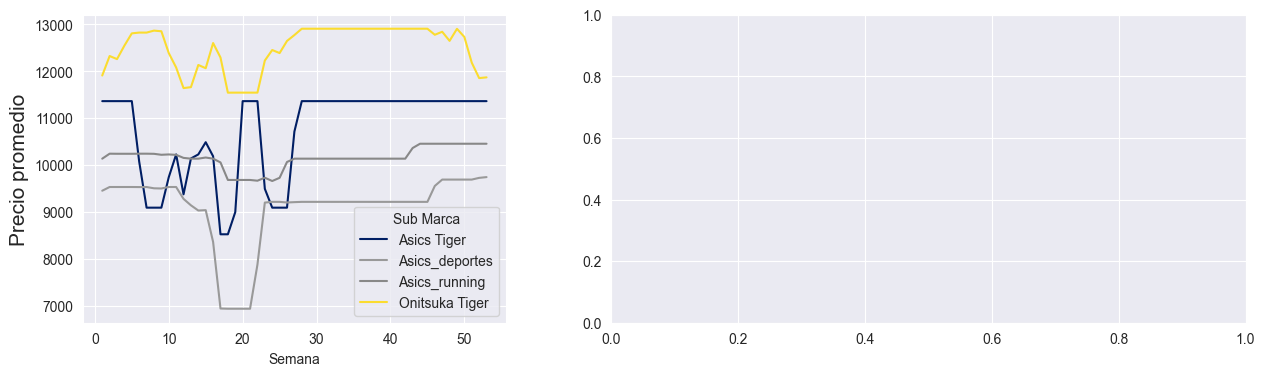

In [21]:
colors = ['#001e64', '#999999', '#888888', '#FBDC2F']

analisis = 'Sub Marca'
valores = 'Precio'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4), gridspec_kw={'width_ratios': [1, 1.5]})

#Plot Semanas acumuladas
pivot_precio = df_asics.pivot_table(index='Nombre Semana', columns=analisis, values=valores, aggfunc='mean').reset_index()
pivot_precio["Nombre Semana"] = pivot_precio["Nombre Semana"].str.split(" ").str[1].astype(int)
pivot_precio = pivot_precio.sort_values(by="Nombre Semana").set_index('Nombre Semana')
pivot_precio.plot(color=colors, ax=axes[0], xlabel='Semana')
axes[0].set_ylabel("Precio promedio", fontsize=15)

#plot evolucion
pivot_evolucion_precio = df_asics.pivot_table(index='semana_año', columns=analisis, values=valores, aggfunc='mean')
pivot_evolucion_precio.plot(color=colors, ax=axes[1], xlabel="año_semana")

#plot show
fig.suptitle(f'Analisis de {valores} segun {analisis}', fontsize=15)
plt.show()

In [ ]:
df_asics = df[df["Marca"] == "Asics"]

In [ ]:
# Definir la categoría
categoria = "Sub Marca"

# Crear subgráficos
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Gráfico de evolución de cantidad
df_evolucion_cantidad = df_asics.pivot_table(index='semana_año', columns=categoria, values='Cantidad', aggfunc='sum')
titulo_cantidad = 'Evolución de la Cantidad Vendida por ' + categoria
df_evolucion_cantidad.plot(kind='line', xlabel='Fecha', ylabel='Cantidad', title=titulo_cantidad, cmap="Set3", ax=axes[0, 0])

# Gráfico de distribución de cantidad
df_sum_cantidad = df_asics.groupby(categoria)['Cantidad'].sum().reset_index()
titulo_cantidad_dist = "Distribución de Cantidad por " + categoria
df_sum_cantidad.plot(kind='pie', y='Cantidad', labels=df_sum_cantidad[categoria], autopct='%1.1f%%', startangle=90, title=titulo_cantidad_dist, cmap="Set3", ax=axes[0, 1], legend = False)

# Gráfico de evolución de precio
df_evolucion_precio = df_asics.pivot_table(index='semana_año', columns=categoria, values='Precio', aggfunc='sum')
titulo_precio = 'Evolución del Precio por ' + categoria
df_evolucion_precio.plot(kind='line', xlabel='Fecha', ylabel='Precio', title=titulo_precio, cmap="Set3", ax=axes[1, 0])

# Gráfico de distribución de precio
df_sum_precio = df_asics.groupby(categoria)['Precio'].mean().reset_index()
titulo_precio_dist = "Distribución de Precio promedio por " + categoria
colores_set3 = ['#8DD3C7','#B3DE69', '#FFFFB3', '#D9D9D9']
df_sum_precio.plot(kind='bar', x=categoria, y='Precio', title=titulo_precio_dist, color=colores_set3, ax=axes[1, 1], legend=False)

# Gráfico de evolución de facturación
df_evolucion_facturacion = df_asics.pivot_table(index='semana_año', columns=categoria, values='Facturación', aggfunc='sum')
titulo_facturacion = 'Evolución de la Facturación por ' + categoria
df_evolucion_facturacion.plot(kind='line', xlabel='Fecha', ylabel='Facturación', title=titulo_facturacion, cmap="Set3", ax=axes[2, 0])

# Gráfico de distribución de facturación
df_sum_facturacion = df_asics.groupby(categoria)['Facturación'].sum().reset_index()
titulo_facturacion_dist = "Distribución de Facturación por " + categoria
df_sum_facturacion.plot(kind='pie', y='Facturación', labels=df_sum_facturacion[categoria], autopct='%1.1f%%', startangle=90, title=titulo_facturacion_dist, cmap="Set3", ax=axes[2, 1], legend = False)

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar la figura con los subgráficos
plt.show()

In [ ]:
df_asics.groupby(['Sub Marca', 'Segmento']).agg(cantidad = ('Cantidad', 'sum'))

Cuenta con tres submarcas: **Asics Onitsuka Tiger y Ascs Tiger**, siendo que la primera esta enfocada en deportes (running y otros deportes) y las dos últimas en lifestyle (social).

Asics es al sub marca que vende mayor cantidad (72%), siendo pro lo tanto la que más factura, habiendo generado el 68% de los ingresos del periodo). Sin embargo, Onitsuka Tiger es la de mayor precio promedio, siendo que la categoría social tiene productos de mayor precios


In [ ]:
# Definir la categoría
categoria = "Segmento"

# Crear subgráficos
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Gráfico de evolución de cantidad
df_evolucion_cantidad = df_asics.pivot_table(index='semana_año', columns=categoria, values='Cantidad', aggfunc='sum')
titulo_cantidad = 'Evolución de la Cantidad Vendida por ' + categoria
df_evolucion_cantidad.plot(kind='line', xlabel='Fecha', ylabel='Cantidad', title=titulo_cantidad, cmap="Set3", ax=axes[0, 0])

# Gráfico de distribución de cantidad
df_sum_cantidad = df_asics.groupby(categoria)['Cantidad'].sum().reset_index()
titulo_cantidad_dist = "Distribución de Cantidad por " + categoria
df_sum_cantidad.plot(kind='pie', y='Cantidad', labels=df_sum_cantidad[categoria], autopct='%1.1f%%', startangle=90, title=titulo_cantidad_dist, cmap="Set3", ax=axes[0, 1], legend = False)

# Gráfico de evolución de precio
df_evolucion_precio = df_asics.pivot_table(index='semana_año', columns=categoria, values='Precio', aggfunc='sum')
titulo_precio = 'Evolución del Precio por ' + categoria
df_evolucion_precio.plot(kind='line', xlabel='Fecha', ylabel='Precio', title=titulo_precio, cmap="Set3", ax=axes[1, 0])

# Gráfico de distribución de precio
df_sum_precio = df_asics.groupby(categoria)['Precio'].mean().reset_index()
titulo_precio_dist = "Distribución de Precio promedio por " + categoria
colores_set3 = ['#8DD3C7','#B3DE69', '#FFFFB3', '#D9D9D9']
df_sum_precio.plot(kind='bar', x=categoria, y='Precio', title=titulo_precio_dist, color=colores_set3, ax=axes[1, 1], legend=False)

# Gráfico de evolución de facturación
df_evolucion_facturacion = df_asics.pivot_table(index='semana_año', columns=categoria, values='Facturación', aggfunc='sum')
titulo_facturacion = 'Evolución de la Facturación por ' + categoria
df_evolucion_facturacion.plot(kind='line', xlabel='Fecha', ylabel='Facturación', title=titulo_facturacion, cmap="Set3", ax=axes[2, 0])

# Gráfico de distribución de facturación
df_sum_facturacion = df_asics.groupby(categoria)['Facturación'].sum().reset_index()
titulo_facturacion_dist = "Distribución de Facturación por " + categoria
df_sum_facturacion.plot(kind='pie', y='Facturación', labels=df_sum_facturacion[categoria], autopct='%1.1f%%', startangle=90, title=titulo_facturacion_dist, cmap="Set3", ax=axes[2, 1], legend = False)

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar la figura con los subgráficos
plt.show()

El segmento del cual más se venden es running, siendo social el de mayor cantidad vendida, mientras que social es le segmento de mayor precio promedio, llevando a que el segmento de mayor facturación sea running (41,5%), seguido por social (32,3%)

In [ ]:
# Definir la categoría
categoria = "Mercado"

# Crear subgráficos
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Gráfico de evolución de cantidad
df_evolucion_cantidad = df_asics.pivot_table(index='semana_año', columns=categoria, values='Cantidad', aggfunc='sum')
titulo_cantidad = 'Evolución de la Cantidad Vendida por ' + categoria
df_evolucion_cantidad.plot(kind='line', xlabel='Fecha', ylabel='Cantidad', title=titulo_cantidad, cmap="Set3", ax=axes[0, 0])

# Gráfico de distribución de cantidad
df_sum_cantidad = df_asics.groupby(categoria)['Cantidad'].sum().reset_index()
titulo_cantidad_dist = "Distribución de Cantidad por " + categoria
df_sum_cantidad.plot(kind='pie', y='Cantidad', labels=df_sum_cantidad[categoria], autopct='%1.1f%%', startangle=90, title=titulo_cantidad_dist, cmap="Set3", ax=axes[0, 1], legend = False)

# Gráfico de evolución de precio
df_evolucion_precio = df_asics.pivot_table(index='semana_año', columns=categoria, values='Precio', aggfunc='sum')
titulo_precio = 'Evolución del Precio por ' + categoria
df_evolucion_precio.plot(kind='line', xlabel='Fecha', ylabel='Precio', title=titulo_precio, cmap="Set3", ax=axes[1, 0])

# Gráfico de distribución de precio
df_sum_precio = df_asics.groupby(categoria)['Precio'].mean().reset_index()
titulo_precio_dist = "Distribución de Precio promedio por " + categoria
colores_set3 = ['#8DD3C7','#FFFFB3', '#B3DE69', '#D9D9D9']
df_sum_precio.plot(kind='bar', x=categoria, y='Precio', title=titulo_precio_dist, color=colores_set3, ax=axes[1, 1], legend=False)

# Gráfico de evolución de facturación
df_evolucion_facturacion = df_asics.pivot_table(index='semana_año', columns=categoria, values='Facturación', aggfunc='sum')
titulo_facturacion = 'Evolución de la Facturación por ' + categoria
df_evolucion_facturacion.plot(kind='line', xlabel='Fecha', ylabel='Facturación', title=titulo_facturacion, cmap="Set3", ax=axes[2, 0])

# Gráfico de distribución de facturación
df_sum_facturacion = df_asics.groupby(categoria)['Facturación'].sum().reset_index()
titulo_facturacion_dist = "Distribución de Facturación por " + categoria
df_sum_facturacion.plot(kind='pie', y='Facturación', labels=df_sum_facturacion[categoria], autopct='%1.1f%%', startangle=90, title=titulo_facturacion_dist, cmap="Set3", ax=axes[2, 1], legend = False)

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar la figura con los subgráficos
plt.show()

La distinción de mercado parecería no tener tanta relevancia, como vemos el precio es igual en ambos mercados (tiene sentido ya que es el mismo país), siendo que se vende mayor cantidad y se factura mas en el Mercado 2.